In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, MiniBatchKMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA 

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2013/results.csv')

In [3]:
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [4]:
df.drop('ctz', axis=1).dropna().describe() #this will hurt the data set and it has zero relevance to the data.

,age,division,official,overall,pace,genderdiv
count,14701.000000,14701.000000,14701.000000,14701.000000,14701.000000,14701.000000
mean,41.402422,1115.322359,208.724292,8536.029046,7.968954,4339.229304
std,10.426038,947.694827,23.382720,5042.430706,0.891978,2759.244643
min,18.000000,1.000000,90.900000,4.000000,3.470000,1.000000
25%,33.000000,370.000000,192.320000,4184.000000,7.350000,2044.000000
50%,42.000000,853.000000,209.830000,8403.000000,8.020000,4095.000000
75%,49.000000,1583.000000,225.550000,12758.000000,8.620000,6290.000000
max,80.000000,3834.000000,284.230000,17598.000000,10.850000,10648.000000


In [5]:
df = df.drop('ctz', axis=1).dropna()

In [6]:
features = df[['5k','10k','20k','25k','30k','35k','40k','half','pace','official','age']]

##

features['genderfemale'] = 0
features.loc[(df['gender'] == 'F'), 'genderfemale'] = 1

c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
features = features.convert_objects(convert_numeric=True)
features = features.dropna()

c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [8]:
features.head()

,5k,10k,20k,25k,30k,35k,40k,half,pace,official,age,genderfemale
0,8.90,18.18,38.80,49.87,62.07,74.73,85.55,40.93,3.47,90.90,28,0
8,9.38,19.77,41.77,52.62,64.00,75.95,86.48,43.97,3.50,91.78,49,0
17,9.38,19.75,42.05,53.07,65.68,79.13,89.88,44.20,3.65,95.48,46,0
22,9.37,19.78,42.02,53.08,65.97,79.82,90.45,44.18,3.67,95.98,29,0
23,15.57,30.92,61.52,77.28,93.17,109.25,125.18,64.92,5.05,132.20,32,0


In [9]:
features.loc['over50menmedian'] = features[features['age'] >= 50][features['genderfemale'] == 1].median()
features.loc['over50womenmedian'] = features[features['age'] >= 50][features['genderfemale'] == 0].median()

features.loc['under50menmedian'] = features[features['age'] <= 49][features['genderfemale'] == 1].median()
features.loc['under50womenmedian'] = features[features['age'] <= 49][features['genderfemale'] == 0].median()

c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [10]:
over50menmedianseconds = features.loc['over50menmedian'].iloc[:8].values.tolist()
over50menmediansecondslist = []
for j in over50menmedianseconds:
    over50menmediansecondslist.append(j)

over50womenmedianseconds = features.loc['over50womenmedian'].iloc[:8].values.tolist()
over50womenmediansecondslist = []
for j in over50womenmedianseconds:
    over50womenmediansecondslist.append(j)
    
under50menmedianseconds = features.loc['under50menmedian'].iloc[:8].values.tolist()
under50menmediansecondslist = []
for j in under50menmedianseconds:
    under50menmediansecondslist.append(j)

under50womenmedianseconds = features.loc['under50womenmedian'].iloc[:8].values.tolist()
under50womenmediansecondslist = []
for j in under50womenmedianseconds:
    under50womenmediansecondslist.append(j)

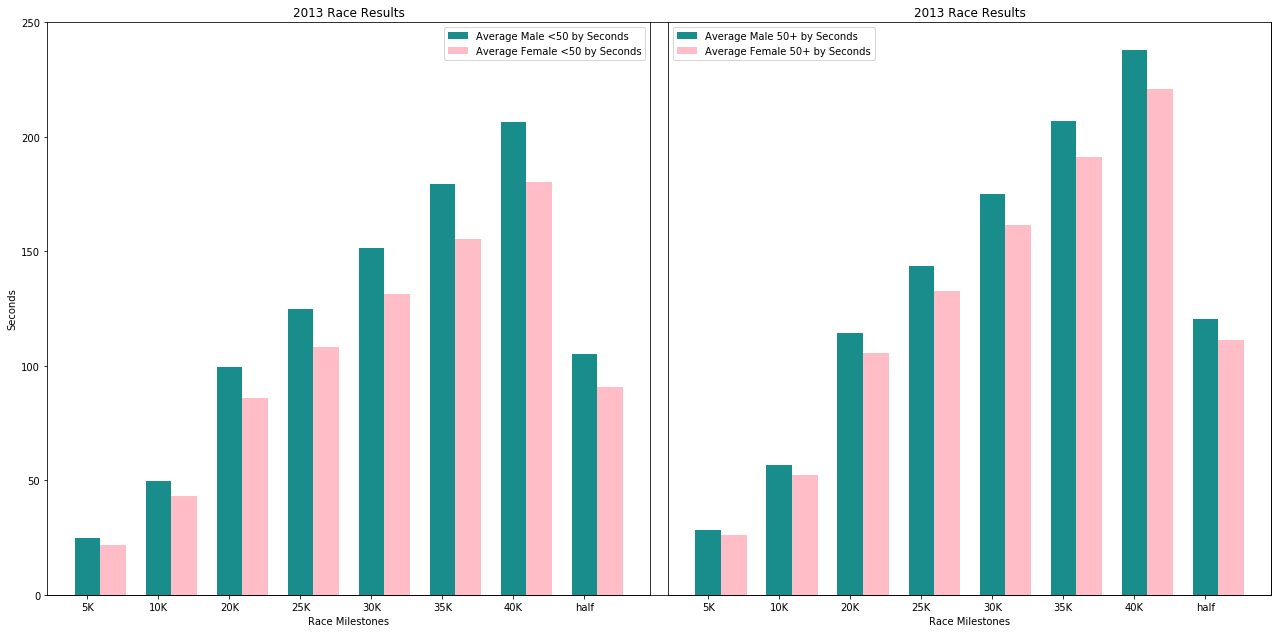

In [30]:
n_groups = 8

fig, ax = plt.subplots(figsize=(18,9))
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax = fig.add_subplot(121)

index = np.arange(n_groups)
bar_width = 0.36
opacity = 0.9

rects1 = plt.bar(index, under50menmediansecondslist, bar_width,
                 alpha=opacity,
                 color='teal',
                 label='Average Male <50 by Seconds')
 
rects2 = plt.bar(index + bar_width, under50womenmediansecondslist, bar_width,
                 alpha=opacity,
                 color='lightpink',
                 label='Average Female <50 by Seconds')
 
plt.xlabel('Race Milestones')
plt.ylabel('Seconds')
plt.title('2013 Race Results')
plt.yticks(np.arange(0, 260, 50))
plt.xticks(index, ('5K', '10K', '20K', '25K', '30K', '35K', '40K', 'half'))
plt.legend()

ax = fig.add_subplot(122)
ax.axes.get_yaxis().set_visible(False)

index = np.arange(n_groups)
bar_width = 0.36
opacity = 0.9
 
rects1 = plt.bar(index, over50menmediansecondslist, bar_width,
                 alpha=opacity,
                 color='teal',
                 label='Average Male 50+ by Seconds')
 
rects2 = plt.bar(index + bar_width, over50womenmediansecondslist, bar_width,
                 alpha=opacity,
                 color='lightpink',
                 label='Average Female 50+ by Seconds')
 
plt.xlabel('Race Milestones')
plt.ylabel('Seconds')
plt.title('2013 Race Results')
plt.xticks(index, ('5K', '10K', '20K', '25K', '30K', '35K', '40K', 'half'))
plt.legend()

plt.tight_layout()
plt.show()

The results with the participants in the race of the <50 vs. 50+ age groups same to trend the same way except that more participants went up in the 40K race in the 50+ age group than the younger age group.

# DBSCAN Results

In [12]:
features1 = features[['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'pace', 'official', 'age', 'genderfemale', 'half']]

In [13]:
features1_50overmale = features1[features1['genderfemale'] == 1][features1['age'] >= 50]
features1_50overfemale = features1[features1['genderfemale'] == 0][features1['age'] >= 50]

c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [14]:
DBSCANdfmale = features1_50overmale[['half','pace']]
DBSCANdffemale = features1_50overfemale[['half','pace']]

In [15]:
dbsc = DBSCAN(eps = .5, min_samples = 30).fit(DBSCANdffemale)

labels_female = dbsc.labels_
coresamplesfemale = np.zeros_like(labels_female, dtype = bool)
coresamplesfemale[dbsc.core_sample_indices_] = True

In [16]:
dbsc = DBSCAN(eps = .5, min_samples = 30).fit(DBSCANdfmale)

labelsmale = dbsc.labels_
coresamplesmale = np.zeros_like(labelsmale, dtype = bool)
coresamplesmale[dbsc.core_sample_indices_] = True

In [17]:
resultsmale=list(coresamplesmale)
DBSCANdfmale['Results']=resultsmale

resultsfemale=list(coresamplesfemale)
DBSCANdffemale['Results']=resultsfemale

c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


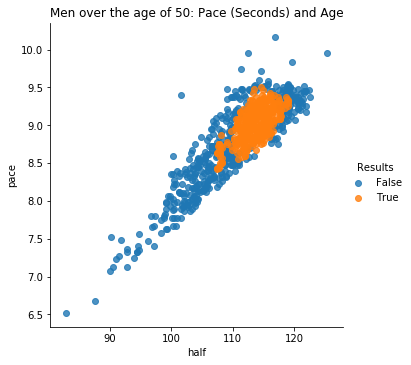

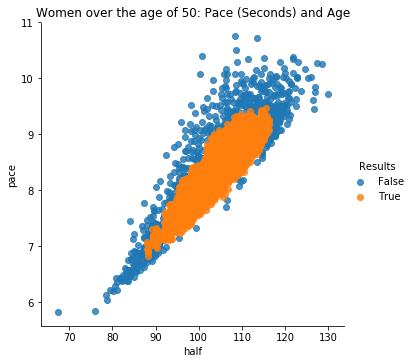

In [18]:
sns.lmplot('half', 'pace', data=DBSCANdfmale, fit_reg=False, hue='Results')
plt.title('Men over the age of 50: Pace (Seconds) and Age')

sns.lmplot('half', 'pace', data=DBSCANdffemale, fit_reg=False, hue='Results')
plt.title('Women over the age of 50: Pace (Seconds) and Age')

plt.show()

In [19]:
X = features[features['age'] >= 50].drop(['genderfemale'], axis=1)
y = features['genderfemale'][features['age'] >= 50]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

# K-Means

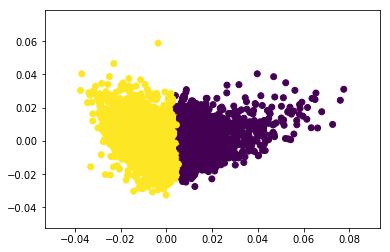

K-means vs. data:
genderfemale   0.0  1.0
row_0                  
0              811  257
1             1904  502


In [20]:
X_norm = normalize(X)

X_pca = PCA(2).fit_transform(X_norm)

y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

print('K-means vs. data:')
print(pd.crosstab(y_pred, y))

# Mini-Batch

In [29]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

predict_mini = minibatchkmeans.predict(X_pca)

print('K-Means vs. mini batches:')
print(pd.crosstab(predict_mini, y_pred))

K-Means vs. mini batches:
col_0     0     1
row_0            
0         0  2370
1      1068    36


# Tables for Contingency

In [22]:
full_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_norm)

pd.crosstab(y, full_pred)

col_0,0,1
genderfemale,,
0.0,808,1907
1.0,253,506


In [28]:
metrics1 = metrics.adjusted_rand_score(y, full_pred)
print("{} is the adjusted random index.".format(metrics1))

0.01168531279227736 is the adjusted random index.


In [24]:


bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=1000)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_pca)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("{} is the number of estimated clusters.".format(n_clusters_))

2 is the number of estimated clusters.


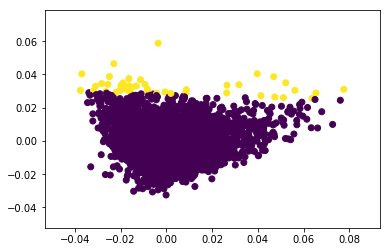

Categories vs. data:
col_0     0   1
row_0          
0      1053  15
1      2374  32


In [25]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

print('Categories vs. data:')
print(pd.crosstab(y_pred,labels))